##### In this project, I will look at how New Zealand's long term birth rate, and compare this with cost of living and labour force participation rates. The births dataset displays the fertility rate (average number of births per woman over her lifetime) for Maori and non-Maori. Birth rates for Maori were only collected from 1962 onward.

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Firstly, I need to import and clean the births dataset.

In [160]:
births = pd.read_csv("births.csv", header = 1)
births = births.rename(columns={'Unnamed: 0':'Year'})
births.head()

,Year,Female,Maori Female
0,1921,3.08,..
1,1922,3.08,..
2,1923,2.96,..
3,1924,2.93,..
4,1925,2.90,..


In [161]:
births.tail(n=37)

,Year,Female,Maori Female
98,2019,1.72,2.09
99,2020,1.61,2.06
100,2021,1.64,1.99
101,2022,1.66,2.05
102,Table information:,NaN,NaN
103,Units:,NaN,NaN
104,"/ woman, Magnitude = Units",NaN,NaN
105,NaN,NaN,NaN
106,Footnotes:,NaN,NaN
107,Rates from 1991 onward are based on the reside...,NaN,NaN


In [162]:
births = births[1:102]
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 1 to 101
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          101 non-null    object 
 1   Female        101 non-null    float64
 2   Maori Female  101 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


##### Removed bottom 32 rows not containing yearly data.

##### Need to convert Year column to date time object and other columns to numeric

In [163]:
births.Year = pd.to_datetime(births.Year) 
births.Female = pd.to_numeric(births.Female)
births['Maori Female'] = pd.to_numeric(births['Maori Female'], errors='coerce')
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 1 to 101
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year          101 non-null    datetime64[ns]
 1   Female        101 non-null    float64       
 2   Maori Female  56 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.5 KB


##### Data types look good. Need to create a series for births per Maori women for plotting, by removing NaNs:

In [164]:
births_maori = births[births['Year'] > '1961']['Maori Female']
births_maori

41     6.18
42     6.28
43     5.96
44     5.71
45     5.54
       ... 
97     2.13
98     2.09
99     2.06
100    1.99
101    2.05
Name: Maori Female, Length: 61, dtype: float64

Text(0.5, 1.0, 'Average number of births per Women over Time')

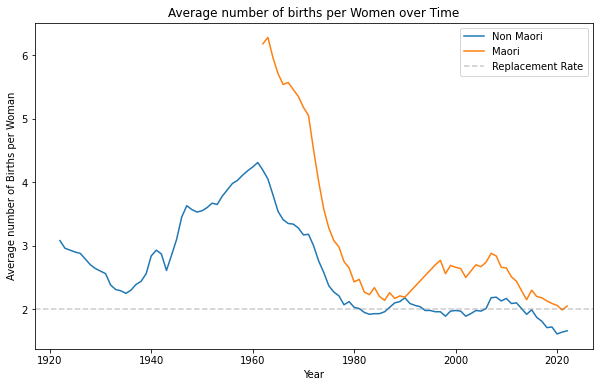

In [165]:
plt.figure(figsize=(10,6))
sns.lineplot(data=births, x = 'Year', y ='Female', label='Non Maori')
sns.lineplot(x = births['Year'], y = births_maori, label='Maori')
plt.axhline(y=2, alpha = 0.4, color='grey', linestyle='--', label='Replacement Rate')
plt.legend(loc='upper right')
plt.ylabel("Average number of Births per Woman")
plt.title("Average number of births per Women over Time")

##### From about 1960 onwards, we see a steep decrease in the births per Woman for Maori, and while births don't decrease to the level of non-Maori, we see a similar pattern in each category from about 1990 to today.

##### Need to import labour force data and clean it.

In [166]:
labour_force = pd.read_csv("labour force.csv")
labour_force = labour_force[0:39]
male_labour_force_total = pd.to_numeric(labour_force['Unnamed: 9'][2:])
female_labour_force_total = pd.to_numeric(labour_force['Unnamed: 20'][2:])
year = labour_force.iloc[2:,0]
unemployed_males = pd.to_numeric(labour_force.iloc[2:,6])
unemployed_females = pd.to_numeric(labour_force.iloc[2:,28])

##### Code below creates a new labour data frame which contains absolute labour force participation numbers as well as proportions, by Gender.

In [167]:
labour_new = pd.concat([year, unemployed_males, unemployed_females, female_labour_force_total, male_labour_force_total],axis=1)
labour_new.columns = ['Year', 'Unemployed Males', 'Unemployed Females', 'Labour Force (Female)', 'Labour Force (Male)']
labour_new.Year = pd.to_datetime(labour_new.Year)
labour_new['Female Labour Participation Proportion'] = labour_new['Labour Force (Female)'] / (labour_new['Labour Force (Female)'] + labour_new['Unemployed Females'])
labour_new['Male Labour Participation Proportion'] = labour_new['Labour Force (Male)'] / (labour_new['Labour Force (Male)'] + labour_new['Unemployed Males'])
labour_new.head()

,Year,Unemployed Males,Unemployed Females,Labour Force (Female),Labour Force (Male),Female Labour Participation Proportion,Male Labour Participation Proportion
2,1986-01-01,35.9,70.7,710.0,979.1,0.909440,0.964631
3,1987-01-01,39.5,71.4,719.8,975.3,0.909757,0.961076
4,1988-01-01,55.7,96.3,716.4,951.6,0.881506,0.944704
5,1989-01-01,70.0,120.1,704.5,939.2,0.854354,0.930638
6,1990-01-01,79.0,132.9,725.2,942.3,0.845123,0.922648


##### Units are in 1,000s.

##### Plot the new dataframe.

Text(0.5, 1.0, 'Labour Force Participation Proportion by Gender')

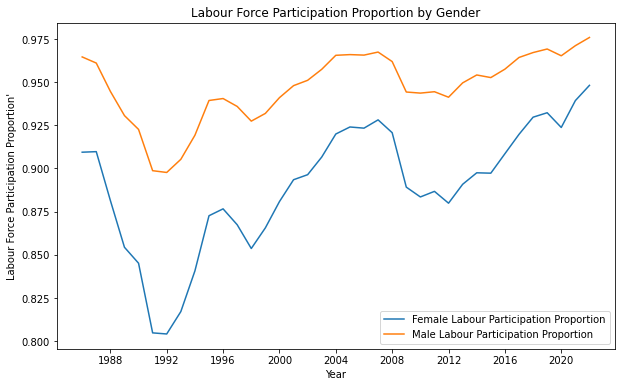

In [168]:
plt.figure(figsize=(10,6))
sns.lineplot(data=labour_new, x='Year', y='Female Labour Participation Proportion', label='Female Labour Participation Proportion')
sns.lineplot(data=labour_new, x='Year', y='Male Labour Participation Proportion', label='Male Labour Participation Proportion')
plt.legend(loc='lower right')
plt.ylabel("Labour Force Participation Proportion'")
plt.title("Labour Force Participation Proportion by Gender")

##### We see a similar pattern over time for both Male and Female labour participation, with the former staying around 5-10% higher over time.

Text(0.5, 1.0, 'Average Births per Woman (Maori and non-Maori) vs. Female Labour Participation Proportion')

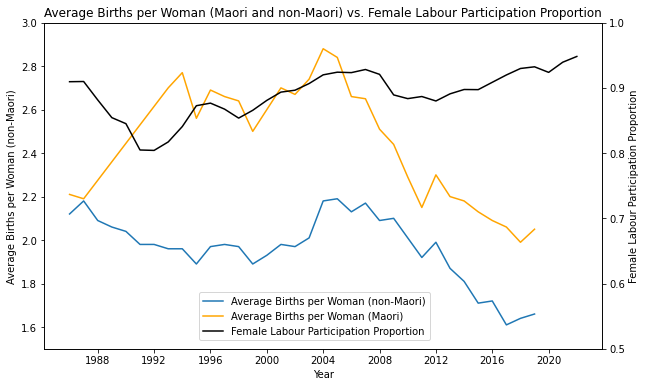

In [169]:
births_from_1986 = births[births['Year'] >= '1986'].iloc[1:,1:].reset_index(drop=True)
births_from_1986
labour_new['Average Births per Woman (non-Maori)'] = births_from_1986.iloc[1:,0]
labour_new['Average Births per Woman (Maori)'] = births_from_1986.iloc[1:,1]
fig, ax1 = plt.subplots()
sns.lineplot(data=labour_new, x='Year', y='Average Births per Woman (non-Maori)', ax=ax1)
sns.lineplot(data=labour_new, x='Year', y='Average Births per Woman (Maori)', ax=ax1, color='orange')
ax2 = ax1.twinx()
sns.lineplot(data=labour_new, x='Year', y='Female Labour Participation Proportion', ax=ax2, color='black')
fig.set_size_inches(10, 6)
ax1.set_ylim(1.5, 3) # Ensures both axes operate on the same scale.
ax2.set_ylim(0.5, 1)
fig.legend(loc='center', labels=['Average Births per Woman (non-Maori)', 'Average Births per Woman (Maori)', 'Female Labour Participation Proportion'], bbox_to_anchor=(0.5, 0.2))
plt.title("Average Births per Woman (Maori and non-Maori) vs. Female Labour Participation Proportion")

##### Overall we see a very similar trend in the relationship between Female Labour Partcipation Proportion and average birth rates per woman for both Maori and non-Maori. Something to note is that the first 6 years following 1986 contained missing values for Maori, so the initial increase may up to 1992 may have shown a different trend. The main thing to take away from this visualisation is that we see a negative relationship between Female Labour Participation Proportion and average Births per Woman for both Maori and non-Maori. 

##### Need to import and clean CPI data. CPI Data is quarterly, so I will condense the dataframe into a yearly average for CPI Index.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 288 to 435
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       148 non-null    object 
 1   CPI Index  148 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


C:\Users\joshg\AppData\Local\Temp\ipykernel_31584\1492652901.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cpi['Year and Quarter'] = cpi['Year and Quarter'].str.replace('Q.*', '')


Text(0.5, 1.0, 'CPI Index over time')

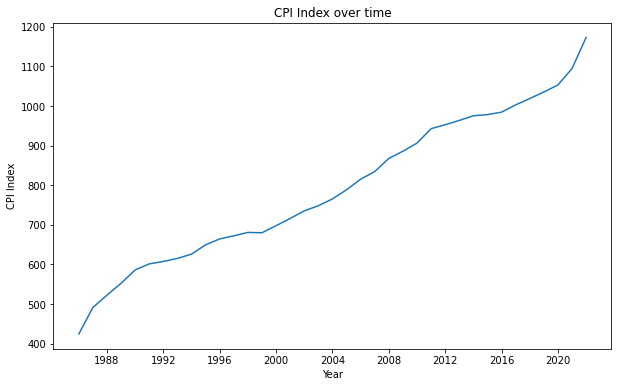

In [170]:
cpi = pd.read_csv("cpi.csv")
cpi = cpi.iloc[288:436,0:] # remove unnessecary information from bottom of table and start in 1986
cpi.columns = ['Year and Quarter', 'CPI Index']
cpi['Year and Quarter'] = cpi['Year and Quarter'].str.replace('Q.*', '')
cpi = cpi.rename(columns={'Year and Quarter' : 'Year'})
cpi['CPI Index'] = pd.to_numeric(cpi['CPI Index'])
cpi.info()
cpi_new = cpi.groupby('Year')['CPI Index'].agg('mean').reset_index()
cpi_new['Year'] = pd.to_datetime(cpi_new['Year'])
plt.figure(figsize=(10,6))
sns.lineplot(data=cpi_new, x='Year', y='CPI Index')
plt.title("CPI Index over time")

##### CPI has increased fairly steadily, will have to compare this to median wage to see if the actual cost of living has increased relative to median earnings. Roughly the same scale so can compare absolute values. 

In [171]:
income = pd.read_csv("income.csv")
income.Year = pd.to_datetime(income.Year, format='%Y')
income['Median Weekly Earnings'] = pd.to_numeric(income['Median Weekly Earnings'])
income.head()

,Year,Median Weekly Earnings
0,1998-01-01,518
1,1999-01-01,520
2,2000-01-01,537
3,2001-01-01,560
4,2002-01-01,575


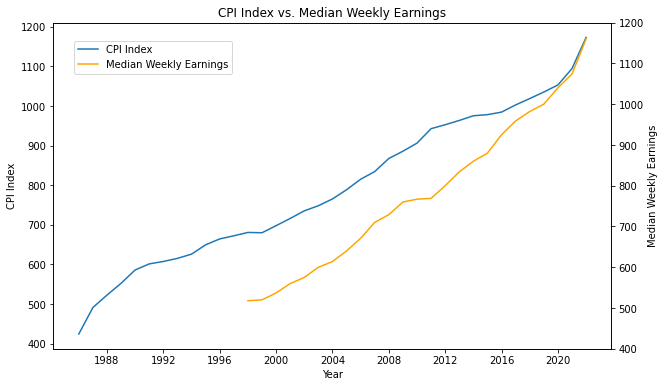

In [172]:
fig, ax = plt.subplots()
sns.lineplot(data=cpi_new, x='Year', y='CPI Index')
ax1 = ax.twinx()
sns.lineplot(data=income, x='Year', y='Median Weekly Earnings', color='orange', ax = ax1)
ax1.set_ylim(400,1200)
plt.title("CPI Index vs. Median Weekly Earnings")
fig.set_size_inches(10,6)
fig.legend(labels=['CPI Index', 'Median Weekly Earnings'], bbox_to_anchor=(0.38, 0.85))

##### From the above visualisation we can see that median wages appear to be keeping up with inflation fairly well over the last 25 years. I'll convert this into a ratio to use as a proxy for ability to afford the cost of living, so we can plot this over the births chart and see whether this has an effect.

In [173]:
cpi_new.info()
cpi_1987 = cpi_new.iloc[1:,0:]
income['Median Earnings to CPI Index ratio'] = income['Median Weekly Earnings'] / cpi_new[cpi_new['Year'] >= '1998']['CPI Index'].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       37 non-null     datetime64[ns]
 1   CPI Index  37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 720.0 bytes


##### The new 'CPI Index to Median Earnings ratio' column represents the cost of living relative to wages, where a value of 1 means that median weekly earnings adjusted for inflation is the same. That is, the real cost of living has not changed. 

##### Let's reproduce the plot from earlier, with the new ratio included.

Text(0.5, 1.0, 'Average Births per Woman vs. Median Earnings to CPI Index ratio')

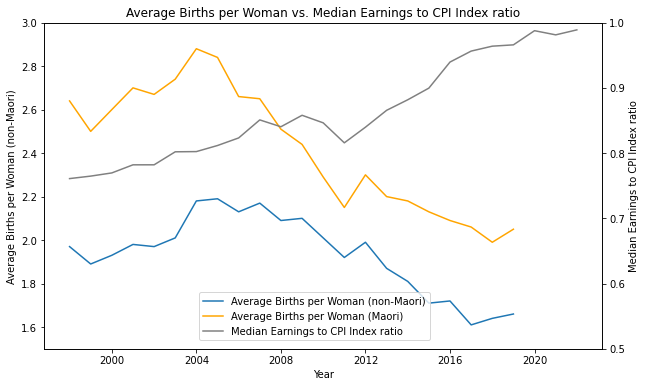

In [174]:
births_from_1986 = births[births['Year'] >= '1986'].iloc[1:,1:].reset_index(drop=True)
births_from_1986
labour_new['Average Births per Woman (non-Maori)'] = births_from_1986.iloc[1:,0]
labour_new['Average Births per Woman (Maori)'] = births_from_1986.iloc[1:,1]
fig, ax1 = plt.subplots()
sns.lineplot(data=labour_new[labour_new['Year'] >= '1998'], x='Year', y='Average Births per Woman (non-Maori)', ax=ax1)
sns.lineplot(data=labour_new[labour_new['Year'] >= '1998'], x='Year', y='Average Births per Woman (Maori)',ax=ax1, color='orange')
ax2 = ax1.twinx()
sns.lineplot(data=income, x='Year', y='Median Earnings to CPI Index ratio', color='grey', ax=ax2)
fig.set_size_inches(10, 6)
ax1.set_ylim(1.5, 3) # Ensures both axes operate on the same scale.
ax2.set_ylim(0.5, 1)
fig.legend(loc='center', labels=['Average Births per Woman (non-Maori)', 'Average Births per Woman (Maori)', 'Median Earnings to CPI Index ratio'], bbox_to_anchor=(0.5, 0.2))
plt.title("Average Births per Woman vs. Median Earnings to CPI Index ratio")

##### This is an interesting plot, because the increase in the Median Earnings to CPI Index ratio indicates that most people are earning more relative to the cost of living. Intuitively, you would think that as people are better able to afford the cost of living, they would be more likely to have more children. However, the data doesn't reflect this. This suggests that the greater proprtion of women participating in the labour force is likely a greater influence on the shrinking birth rate than the cost of living. Something that might be worth investigating in future is whether CPI Index to Median Weekly Earnings is a valid proxy for cost of living, as there may be other factors that contribute to the cost of living that are not included in the CPI. Also, because median wages are used, this makes it difficult to interpret the results specifically for low earners and high earners. 

##### In conclusion, from the data I've analysed, it appears that participation in the workforce is the greatest driver of declining birth rates. However, I suspect this doesn't provide the whole picture as the decrease in birth rates is proportionately far greater than the increase in workforce participation for women. Other factors to look at in the future could include availability of and access to contraception, social influences and attitudes towards having children.  